In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [7]:
dfCEAS = pd.read_csv('data/CEAS_08.csv')
dfSA = pd.read_csv('data/SpamAssasin.csv')

In [8]:
print("CEAS_08 Dataset")
print(f"Number of rows: {dfCEAS.shape[0]}, Number of Columns: {dfCEAS.shape[1]}")
print("Spam Assasin Dataset")
print(f"Number of rows: {dfSA.shape[0]}, Number of columns: {dfSA.shape[1]}")


CEAS_08 Dataset
Number of rows: 39154, Number of Columns: 7
Spam Assasin Dataset
Number of rows: 5809, Number of columns: 7


In [4]:
print(dfCEAS.info())
print(dfCEAS.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB
None
                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   

In [9]:
print(dfSA.info())
print(dfSA.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    5809 non-null   object
 1   receiver  5599 non-null   object
 2   date      5809 non-null   object
 3   subject   5793 non-null   object
 4   body      5808 non-null   object
 5   label     5809 non-null   int64 
 6   urls      5809 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 317.8+ KB
None
                                      sender  \
0             Robert Elz <kre@munnari.OZ.AU>   
1  Steve Burt <Steve_Burt@cursor-system.com>   
2              "Tim Chapman" <timc@2ubh.com>   
3           Monty Solomon <monty@roscom.com>   
4  Stewart Smith <Stewart.Smith@ee.ed.ac.uk>   

                                            receiver  \
0  Chris Garrigues <cwg-dated-1030377287.06fa6d@D...   
1  "'zzzzteana@yahoogroups.com'" <zzzzteana@yahoo...   
2              zzzzteana <zzzzteana@ya

In [10]:
dfCombine = pd.concat([dfCEAS, dfSA])
print(dfCombine.info())
print(dfCombine.head())

<class 'pandas.core.frame.DataFrame'>
Index: 44963 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    44963 non-null  object
 1   receiver  44291 non-null  object
 2   date      44963 non-null  object
 3   subject   44919 non-null  object
 4   body      44962 non-null  object
 5   label     44963 non-null  int64 
 6   urls      44963 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB
None
                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2    

In [11]:
print(dfCombine.duplicated().value_counts())

False    44963
Name: count, dtype: int64


In [12]:
print(dfCombine.iloc[0])

sender                       Young Esposito <Young@iworld.de>
receiver                          user4@gvc.ceas-challenge.cc
date                          Tue, 05 Aug 2008 16:31:02 -0700
subject                             Never agree to be a loser
body        Buck up, your troubles caused by small dimensi...
label                                                       1
urls                                                        1
Name: 0, dtype: object


label
1    23560
0    21403
Name: count, dtype: int64


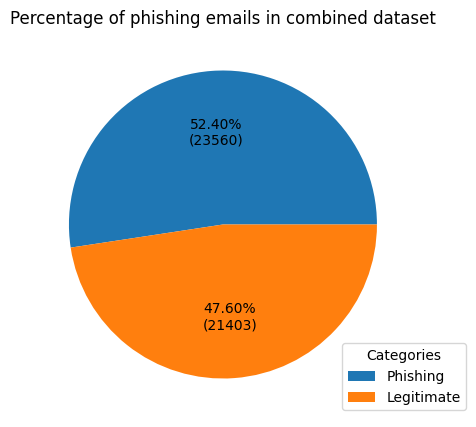

In [146]:
print(dfCombine['label'].value_counts())
labels = ['Phishing', 'Legitimate']
x = dfCombine['label'].value_counts()
plt.figure(figsize=(5,5))
def func(pct, values):
    absolute = int(pct/100.*sum(values))
    return '{:.2f}%\n({:d})'.format(pct, absolute)
plt.pie(x, colors=['tab:blue', 'tab:orange'], autopct=lambda pct: func(pct, x), startangle=0,)
plt.title('Percentage of phishing emails in combined dataset')
plt.legend(labels, title='Categories', loc='lower right', bbox_to_anchor=(1.15, 0))
plt.show()

In [14]:
print(dfCombine['sender'].value_counts())

sender
qydlqcws-iacfym@issues.apache.org                         462
Guido van Rossum <hoauf@python.org>                       295
"\\"Martin v. Löwis\\"" <qpnysl@v.loewis.de>              276
"Carlos E. R." <vyjwd.trpcau@telefonica.net>              208
Aaron Kulkis <cmiqlkx91@hotpop.com>                       183
                                                         ... 
Linwood Sloan <Linwood@goline.ca>                           1
puromaki <verkoeld1978@stfrancis.k12.mn.us>                 1
Maryellen Costello <shadiervh97@gillscruisecentre.com>      1
Daily Top 10 <steins@4000down.com>                          1
Daily Top 10 <orn|dent_1973@musicaedischi.it>               1
Name: count, Length: 27101, dtype: int64


In [62]:
print(dfCombine['receiver'].value_counts())

receiver
user6@gvc.ceas-challenge.cc                         1375
wkilxloc@opensuse.org                               1230
user2.1@gvc.ceas-challenge.cc                       1037
user2.2@gvc.ceas-challenge.cc                        922
user2.4@gvc.ceas-challenge.cc                        738
                                                    ... 
andrea_justice@yahoo.com, c3ponr2d2@hotmail.com,       1
jtr@usa.net                                            1
"FreeStoreClub" <breakfree@luxmail.com>                1
ilug@linux.ie, ilug-request@linux.ie                   1
<klaganga@hotmail.com>, <pipop@loxinfo.co.th>,         1
Name: count, Length: 5290, dtype: int64


In [16]:
print(dfCombine['date'].head())

0    Tue, 05 Aug 2008 16:31:02 -0700
1    Tue, 05 Aug 2008 18:31:03 -0500
2    Tue, 05 Aug 2008 20:28:00 -1200
3    Tue, 05 Aug 2008 17:31:20 -0600
4    Tue, 05 Aug 2008 19:31:21 -0400
Name: date, dtype: object


In [17]:
print(dfCombine['subject'].value_counts())

subject
CNN.com Daily Top 10                                                                                     2930
CNN Alerts: My Custom Alert                                                                              1406
Re:                                                                                                       581
123                                                                                                       255
Re:                                                                                                       125
                                                                                                         ... 
_Melhore sua segurana_                                                                                      1
ADV: Lowest life insurance rates available!                                                   irloq         1
** You're -Approved-! **                                                                                    1
He

urls
1    31234
0    13729
Name: count, dtype: int64


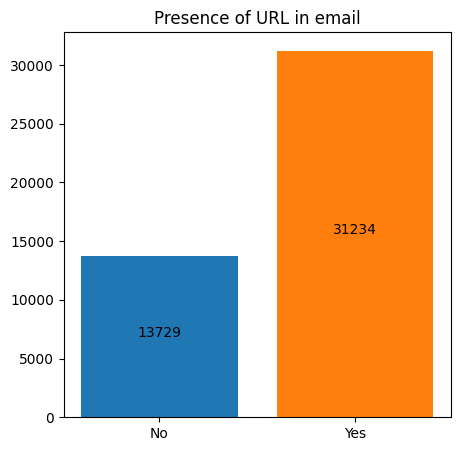

In [147]:
print(dfCombine['urls'].value_counts())
x = ['No', 'Yes']
y = dfCombine['urls'].value_counts(ascending=True)
plt.figure(figsize=(5,5))
plt.bar(x, y, color=['tab:blue','tab:orange'])
plt.title('Presence of URL in email')
for i in range(len(y)):
    plt.text(i , y[i]//2, y[i], ha='center')
plt.show()